Files extracted: ['heart_disease_uci.csv']
5 Baris Pertama:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3   

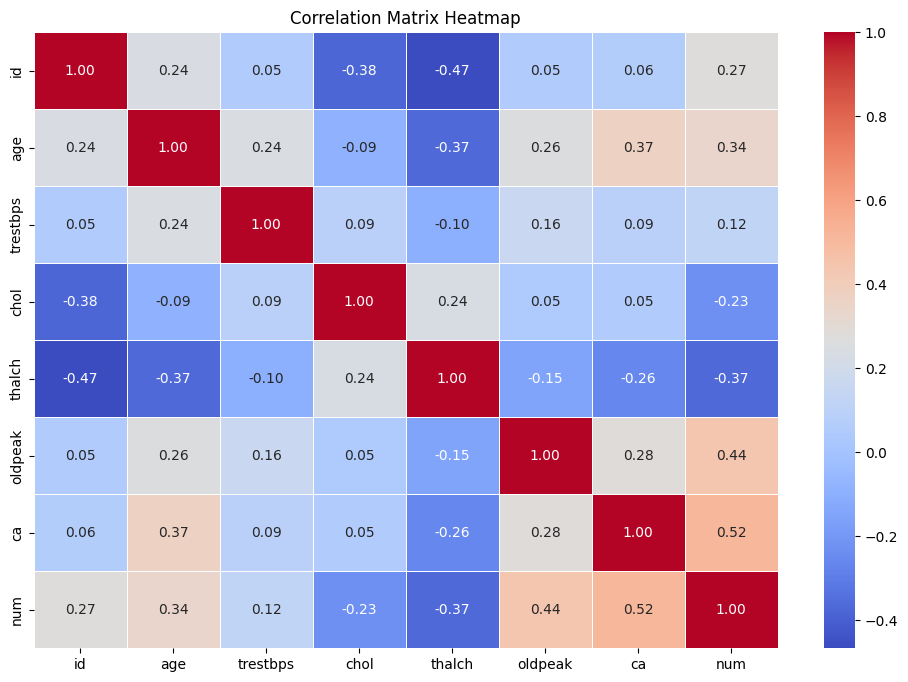

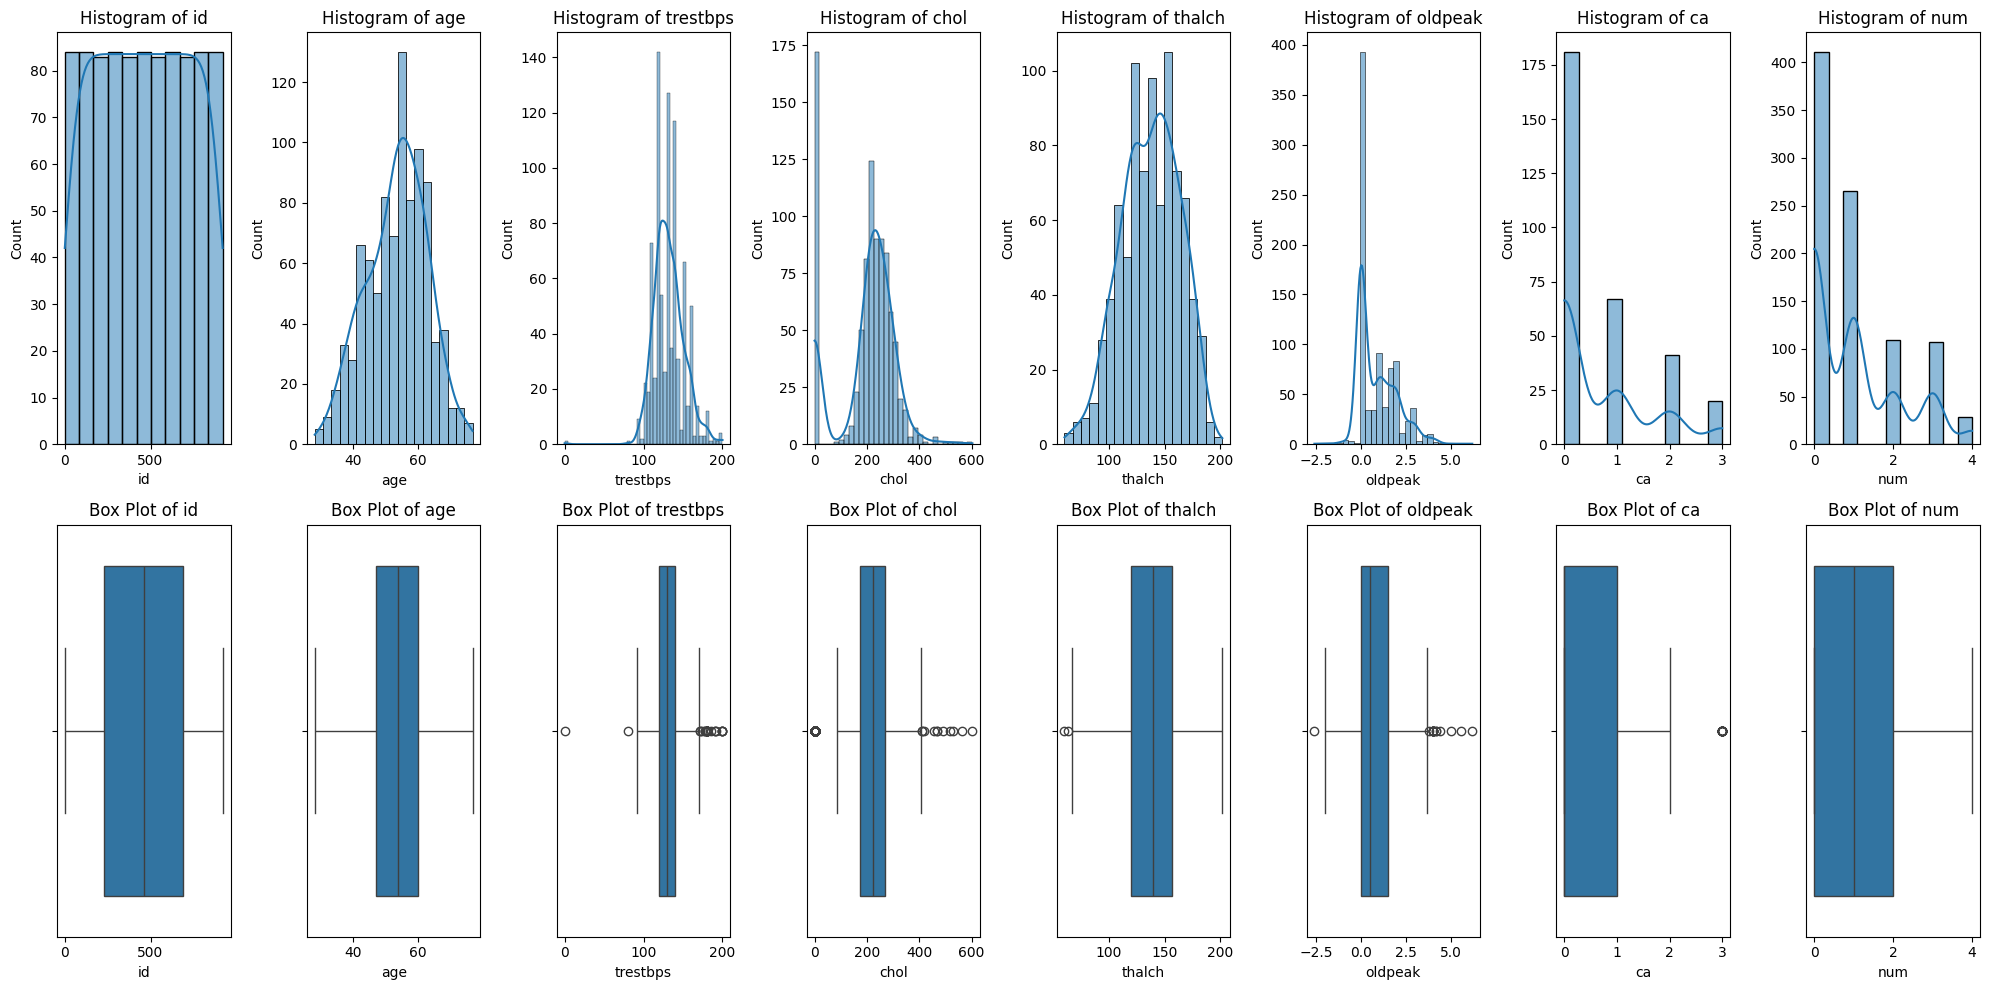


High correlation pairs: [('ca', 'num'), ('num', 'ca')]


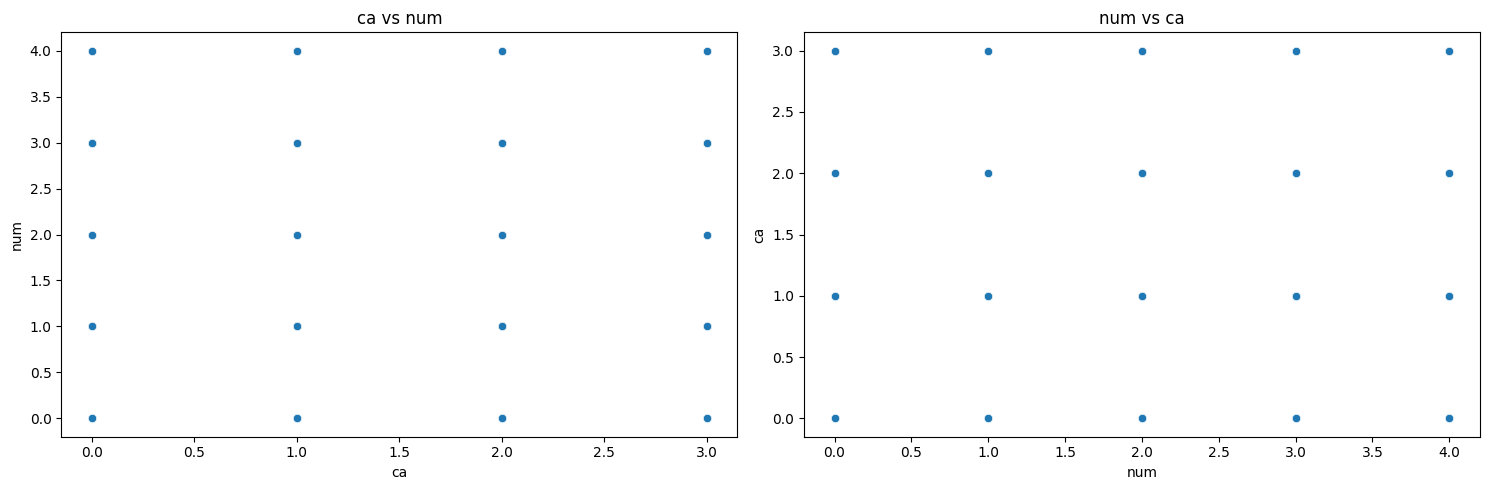

In [12]:
# Import library yang dibutuhkan
import zipfile
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Path ke file zip dan folder ekstraksi
zip_file_path = r"D:\archive.zip"
extracted_folder_path = r"D:\extracted_files"  # Ganti dengan path folder untuk menyimpan file yang diekstrak

# Pastikan folder tujuan ada sebelum mengekstrak
if not os.path.exists(extracted_folder_path):
    os.makedirs(extracted_folder_path)

# Ekstraksi file zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Daftar file yang diekstrak
extracted_files = os.listdir(extracted_folder_path)
print("Files extracted:", extracted_files)

# Membaca dataset
file_path = os.path.join(extracted_folder_path, 'heart_disease_uci.csv')  # Ganti nama file jika berbeda
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dan terakhir dari dataset
print("5 Baris Pertama:")
print(df.head())

print("\n5 Baris Terakhir:")
print(df.tail())

# Informasi tentang dataset
print("\nInformasi Dataset:")
df.info()

# Cek nilai yang hilang
print("\nNilai yang Hilang:")
missing_values = df.isnull().sum()
print(missing_values)

# Deskripsi statistik untuk kolom numerik
# Menampilkan deskripsi statistik untuk kolom numerik
print("\nDescriptive Statistics:")
print(df.describe())

# Mendapatkan daftar kolom numerik
numerical_columns = df.select_dtypes(include=np.number).columns

# Menghitung dan menampilkan statistik deskriptif untuk setiap kolom numerik
for col in numerical_columns:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'  # Mode bisa kosong jika tidak ada mode
    std_dev_val = df[col].std()
    variance_val = df[col].var()
    skewness_val = df[col].skew()
    kurtosis_val = df[col].kurt()

    # Menampilkan hasil statistik
    print(f"\nStatistik untuk kolom '{col}':")
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Mode: {mode_val}")
    print(f"Standar Deviasi: {std_dev_val}")
    print(f"Variansi: {variance_val}")
    print(f"Skewness: {skewness_val}")
    print(f"Kurtosis: {kurtosis_val}")



# Membuat DataFrame untuk menampilkan statistik
stats_df = pd.DataFrame(numerical_stats)
print("\nStatistik Deskriptif:\n", stats_df)

# Menghitung korelasi antar variabel numerik
correlation_matrix = df.corr(numeric_only=True)
print("\nMatriks Korelasi:\n", correlation_matrix)

# Visualisasi heatmap untuk korelasi antar variabel
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Visualisasi histogram dan box plot untuk setiap variabel numerik
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, len(numerical_columns), i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(2, len(numerical_columns), i + 1 + len(numerical_columns))
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Scatter plot untuk pasangan variabel yang memiliki korelasi tinggi
high_corr_pairs = correlation_matrix[(correlation_matrix > 0.5) & (correlation_matrix < 1)].stack().index.tolist()
print("\nHigh correlation pairs:", high_corr_pairs)

if len(high_corr_pairs) > 0:
    plt.figure(figsize=(15, 5))
    for i, (col1, col2) in enumerate(high_corr_pairs):
        plt.subplot(1, len(high_corr_pairs), i + 1)
        sns.scatterplot(x=df[col1], y=df[col2])
        plt.title(f'{col1} vs {col2}')
    plt.tight_layout()
    plt.show()
else:
    print("\nTidak ada pasangan variabel dengan korelasi tinggi.")
